## 1.0 Datenvorbereitung

In [15]:
# Importieren wichtiger Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data  = pd.read_csv("data.csv")
data.head()

,Zeitstempel,Filiale,Artikel,Menge,Umsatz,Bestellungen,Temperatur,Niederschlag,Globalstrahlung,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag
0,2016-01-03 08:01:46,Sulgen Filiale,Butterzopf mittel,1.0,6.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN
1,2016-01-03 08:04:45,Sulgen Filiale,Buttergipfeli,2.0,2.6,0.0,NaN,0.0,NaN,NaN,0.0,NaN
2,2016-01-03 08:09:21,Sulgen Filiale,Buttergipfeli,12.0,15.6,0.0,NaN,0.0,NaN,NaN,0.0,NaN
3,2016-01-03 08:11:19,Sulgen Filiale,Butterzopf mittel,1.0,6.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN
4,2016-01-03 08:11:19,Sulgen Filiale,Buttergipfeli,4.0,5.2,0.0,NaN,0.0,NaN,NaN,0.0,NaN


In [17]:
data_backup = data.copy()

# Transformation des Datensatzes
data["Zeitstempel"] = pd.to_datetime(data["Zeitstempel"])
data["Uhrzeit"] = pd.to_datetime(data["Zeitstempel"]).dt.time
data["Stunde"] = pd.to_datetime(data["Zeitstempel"]).dt.hour
data["Datum"] = pd.to_datetime(data["Zeitstempel"]).dt.date
data["Wochentag"] = pd.to_datetime(data["Zeitstempel"]).dt.day_name()

data.head()

,Zeitstempel,Filiale,Artikel,Menge,Umsatz,Bestellungen,Temperatur,Niederschlag,Globalstrahlung,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag
0,2016-01-03 08:01:46,Sulgen Filiale,Butterzopf mittel,1.0,6.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:01:46,8,2016-01-03,Sunday
1,2016-01-03 08:04:45,Sulgen Filiale,Buttergipfeli,2.0,2.6,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:04:45,8,2016-01-03,Sunday
2,2016-01-03 08:09:21,Sulgen Filiale,Buttergipfeli,12.0,15.6,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:09:21,8,2016-01-03,Sunday
3,2016-01-03 08:11:19,Sulgen Filiale,Butterzopf mittel,1.0,6.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:11:19,8,2016-01-03,Sunday
4,2016-01-03 08:11:19,Sulgen Filiale,Buttergipfeli,4.0,5.2,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:11:19,8,2016-01-03,Sunday


In [18]:
# Konvertieren der Spalten in die richtige Datentypen
data["Datum"] = pd.to_datetime(data["Datum"]).dt.date
wochentag_reihenfolge = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data["Wochentag"] = pd.Categorical(data["Wochentag"], categories = wochentag_reihenfolge, ordered = True)
data['Monat'] = pd.to_datetime(data['Datum']).dt.month

# Entfernen nicht mehr benötigter Spalten
data = data.drop(columns = ["Filiale", "Zeitstempel"], axis = "columns")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727754 entries, 0 to 727753
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Artikel                      727754 non-null  object  
 1   Menge                        727754 non-null  float64 
 2   Umsatz                       727754 non-null  float64 
 3   Bestellungen                 727754 non-null  float64 
 4   Temperatur                   718722 non-null  float64 
 5   Niederschlag                 725226 non-null  float64 
 6   Globalstrahlung              718722 non-null  float64 
 7   Temperatur Schnitt Tag       719687 non-null  float64 
 8   Niederschlag Summe Tag       727754 non-null  float64 
 9   Globalstrahlung Schnitt Tag  719687 non-null  float64 
 10  Uhrzeit                      727754 non-null  object  
 11  Stunde                       727754 non-null  int64   
 12  Datum                        727754 non-null

In [19]:
# Im nächsten Schritt prüfen wir Transaktionen außerhalb der Öffnungszeiten. Im Maximum hat die Bäckerrei von 5:30 bis 19:00 geöffnet.
# Zu erst werden Transaktionen vor Öffnung geprüft.
data_4_uhr = data[data["Stunde"] == 4]
data_4_uhr.head()

# Da sich in einem Histogramm über den Umsatz pro Uhrzeit pro Tag Ausreißer um 4 Uhr finden, werden alle Einträge vor 5 Uhr entfernt.
data = data[data["Stunde"] >= 5]

# 
data_20_uhr = data[data["Stunde"] == 20]
data_20_uhr.head()

#Duplikate entfernen

data.drop_duplicates(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719185 entries, 0 to 727753
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Artikel                      719185 non-null  object  
 1   Menge                        719185 non-null  float64 
 2   Umsatz                       719185 non-null  float64 
 3   Bestellungen                 719185 non-null  float64 
 4   Temperatur                   710279 non-null  float64 
 5   Niederschlag                 716688 non-null  float64 
 6   Globalstrahlung              710279 non-null  float64 
 7   Temperatur Schnitt Tag       711227 non-null  float64 
 8   Niederschlag Summe Tag       719185 non-null  float64 
 9   Globalstrahlung Schnitt Tag  711227 non-null  float64 
 10  Uhrzeit                      719185 non-null  object  
 11  Stunde                       719185 non-null  int64   
 12  Datum                        719185 non-null

In [20]:
# neue Kolumnen für Temperatur und Globalstrahlung einfügen
data = data.drop(columns = ["Temperatur", "Globalstrahlung"], axis = "columns")
data.head()

,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat
0,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:01:46,8,2016-01-03,Sunday,1
1,Buttergipfeli,2.0,2.6,0.0,0.0,NaN,0.0,NaN,08:04:45,8,2016-01-03,Sunday,1
2,Buttergipfeli,12.0,15.6,0.0,0.0,NaN,0.0,NaN,08:09:21,8,2016-01-03,Sunday,1
3,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,Sunday,1
4,Buttergipfeli,4.0,5.2,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,Sunday,1


In [21]:
# Stückpreis berechnet
data["Stückpreis"] = pd.to_numeric(data["Umsatz"] / data["Menge"]).apply(lambda x: '{:.2f}'.format(x))

# Sortieren nach Stückpreis
data_preis = data.sort_values(by='Stückpreis', ascending=True)

In [22]:
n_produkte = data["Artikel"].unique()

# Erstellen einer Produktliste mit der verkauften Anzahl
produkt_liste = data[["Artikel", "Menge"]].groupby("Artikel").sum().sort_values(by="Menge", ascending=False).reset_index()


print("Es sind folgende Produkte im Datensatz enthalten: ")
print(produkt_liste)

Es sind folgende Produkte im Datensatz enthalten: 
                   Artikel     Menge
0            Buttergipfeli  380642.5
1       Laugengi.mit SoBlu  186385.0
2               Maisgipfel  179040.6
3             Laugenbrötli   95742.5
4            Weggli normal   83048.0
5          St. Gallerbürli   79097.0
6           Crèmeschnitten   70883.0
7            BT Nussgipfel   63750.3
8              Quarkzöpfli   62926.0
9        Butterzopf mittel   62808.0
10           Schoggibrötli   43800.0
11  Il pollo forte gefüllt   42087.0
12     Hefe-Vanille-Weggli   39990.0
13           Erdbeertörtli   26792.0


## 2.3 Hinzufügen weiterer Features

### 2.3.0 Feiertage

#### 2.3.0.0 Feiertage aus Liste einlesen
Quelle: https://www.feiertagskalender.ch/index.php?geo=2173&jahr=2016&klasse=5&hl=de

In [23]:
import pandas as pd

# Read the CSV file into a pandas dataframe
holidays_df = pd.read_csv('Liste_Feiertage.csv', delimiter=';')

# Convert the Date column to datetime format
holidays_df['Datum'] = pd.to_datetime(holidays_df['Datum'], format='%d.%m.%Y')

# Rename the 'Datum' column to match the 'Datum' column in the data dataframe
holidays_df = holidays_df.rename(columns={'Datum': 'Holiday_Datum', 'Feiertag': 'Feiertag Name'})

# Convert the 'Datum' column in the data dataframe to datetime format
data['Datum'] = pd.to_datetime(data['Datum'])

# Merge data and holidays_df dataframes on the date
data = data.merge(holidays_df[['Holiday_Datum', 'Feiertag Name']], left_on='Datum', right_on='Holiday_Datum', how='left')

# Fill the missing values in the 'Feiertag Name' column with 'normaler Tag'
data['Feiertag Name'] = data['Feiertag Name'].fillna('normaler Tag')

# Drop the unnecessary 'Holiday_Datum' column
data = data.drop(columns='Holiday_Datum')

# Print the first 5 rows of the dataframe
data.head()


,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat,Stückpreis,Feiertag Name
0,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:01:46,8,2016-01-03,Sunday,1,6.00,normaler Tag
1,Buttergipfeli,2.0,2.6,0.0,0.0,NaN,0.0,NaN,08:04:45,8,2016-01-03,Sunday,1,1.30,normaler Tag
2,Buttergipfeli,12.0,15.6,0.0,0.0,NaN,0.0,NaN,08:09:21,8,2016-01-03,Sunday,1,1.30,normaler Tag
3,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,Sunday,1,6.00,normaler Tag
4,Buttergipfeli,4.0,5.2,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,Sunday,1,1.30,normaler Tag


#### 2.3.0.1 Valentinstag

In [24]:
data.loc[data['Feiertag Name'] == 'Valentinstag']

,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat,Stückpreis,Feiertag Name
10710,Weggli normal,3.0,3.3,0.0,0.0,5.300000,0.0,38.458333,08:01:59,8,2016-02-14,Sunday,2,1.10,Valentinstag
10711,Laugengi.mit SoBlu,1.0,1.5,0.0,0.0,5.300000,0.0,38.458333,08:04:29,8,2016-02-14,Sunday,2,1.50,Valentinstag
10712,Maisgipfel,6.0,9.0,0.0,0.0,5.300000,0.0,38.458333,08:04:59,8,2016-02-14,Sunday,2,1.50,Valentinstag
10713,Butterzopf mittel,1.0,6.0,0.0,0.0,5.300000,0.0,38.458333,08:06:00,8,2016-02-14,Sunday,2,6.00,Valentinstag
10714,Crèmeschnitten,3.0,9.3,0.0,0.0,5.300000,0.0,38.458333,08:06:03,8,2016-02-14,Sunday,2,3.10,Valentinstag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574562,BT Nussgipfel,1.0,2.8,25.0,0.0,-6.354167,0.0,114.083333,15:36:02,15,2021-02-14,Sunday,2,2.80,Valentinstag
574563,St. Gallerbürli,1.0,1.4,60.0,0.0,-6.354167,0.0,114.083333,15:36:46,15,2021-02-14,Sunday,2,1.40,Valentinstag
574564,BT Nussgipfel,1.0,2.8,25.0,0.0,-6.354167,0.0,114.083333,15:40:55,15,2021-02-14,Sunday,2,2.80,Valentinstag
574565,BT Nussgipfel,1.0,2.8,25.0,0.0,-6.354167,0.0,114.083333,15:51:20,15,2021-02-14,Sunday,2,2.80,Valentinstag


#### 2.3.0.2 Fasnacht hinzufügen

Es werden Listen erstellt für den Schmutzigen Donnerstag, den Faschingdienstag und den Aschermittwoch. Alle drei Feiertage sind keine gesetzlichen Feiertage im Kanton TG, werden aber auf Empfehlung von Roger Mohn hinzugefügt. 

In [25]:
# Listen mit den Fasnachts-Feiertagen und ihren Datumsangaben erstellen
schmutzigerDonnerstag = ['2016-02-04', '2017-02-23', '2018-02-08', '2019-02-28', '2020-02-20', '2021-02-11', '2022-02-24']
fasnachtsdienstag = ['2016-02-09', '2017-02-28', '2018-02-13', '2019-03-05', '2020-02-25', '2021-02-16', '2022-03-01' ]
aschermittwoch = ['2016-03-10', '2017-03-01', '2018-02-14', '2019-03-06', '2020-02-26', '2021-02-17', '2022-03-02']

# Schmutziger Donnerstag zuweisen
data.loc[data['Datum'].isin(schmutzigerDonnerstag), 'Feiertag Name'] = 'Schmutziger Donnerstag'

# Fasnachtsdienstag zuweisen
data.loc[data['Datum'].isin(fasnachtsdienstag), 'Feiertag Name'] = 'Fasnachtsdienstag'

# Aschermittwoch zuweisen
data.loc[data['Datum'].isin(aschermittwoch), 'Feiertag Name'] = 'Aschermittwoch'

In [26]:
# Testen, ob Werte im dataframe hinzugefügt wurden
sorted_data_nachSchmutzigerDonnerstag = data[data['Feiertag Name'].str.startswith('Schmutziger Donnerstag')].sort_values(by=['Feiertag Name'])
sorted_data_nachSchmutzigerDonnerstag.head()

,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat,Stückpreis,Feiertag Name
7958,St. Gallerbürli,2.0,2.8,0.0,0.0,3.890909,1.6,12.636364,05:27:40,5,2016-02-04,Thursday,2,1.40,Schmutziger Donnerstag
445963,Quarkzöpfli,1.0,3.9,35.0,0.0,5.895833,0.0,106.750000,07:45:25,7,2020-02-20,Thursday,2,3.90,Schmutziger Donnerstag
445962,Il pollo forte gefüllt,1.0,7.5,30.0,0.0,5.895833,0.0,106.750000,07:45:25,7,2020-02-20,Thursday,2,7.50,Schmutziger Donnerstag
445961,Hefe-Vanille-Weggli,1.0,2.6,10.0,0.0,5.895833,0.0,106.750000,07:45:25,7,2020-02-20,Thursday,2,2.60,Schmutziger Donnerstag
445960,Buttergipfeli,1.0,1.4,60.0,0.0,5.895833,0.0,106.750000,07:44:52,7,2020-02-20,Thursday,2,1.40,Schmutziger Donnerstag


#### 2.3.0.3 Erste Plots für Feiertage

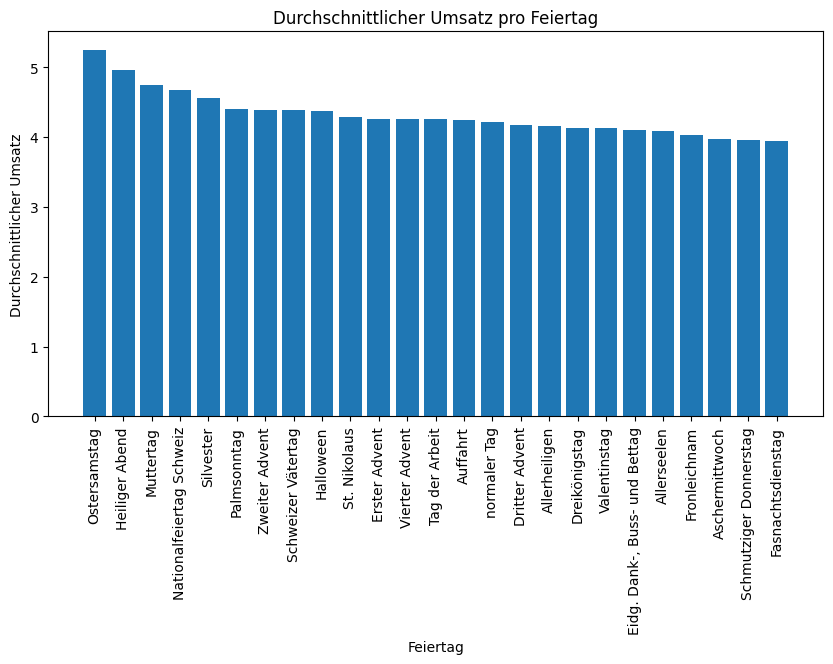

In [27]:
#erstelle einen Plot für den durchschnittlichen Umsatz pro Feiertag

plt.figure(figsize= (10, 5))
plt.bar(data.groupby("Feiertag Name")["Umsatz"].mean().sort_values(ascending = False).index, data.groupby("Feiertag Name")["Umsatz"].mean().sort_values(ascending = False))
plt.title("Durchschnittlicher Umsatz pro Feiertag")
plt.xlabel("Feiertag")
plt.ylabel("Durchschnittlicher Umsatz")
plt.xticks(rotation = 90)

plt.show()

In [28]:
#die informationen aus dem plot in eine Tabelle ausgeben
data.groupby("Feiertag Name")["Umsatz"].mean().sort_values(ascending = False).reset_index()


,Feiertag Name,Umsatz
0,Ostersamstag,5.248667
1,Heiliger Abend,4.957025
2,Muttertag,4.742045
3,Nationalfeiertag Schweiz,4.676658
4,Silvester,4.561564
5,Palmsonntag,4.394883
6,Zweiter Advent,4.394153
7,Schweizer Vätertag,4.389930
8,Halloween,4.376063
9,St. Nikolaus,4.291889


In [29]:
#Einen neuen, leeren Dataframe machen namens "Tag vor Feiertag"
data_vor_feiertag = pd.DataFrame()

#dem neuen Dataframe die Spalten "Datum" und "Vortag von" zuweisen
data_vor_feiertag["Datum"] = ""
data_vor_feiertag["Vortag von"] = ""

#Die Spalte "Datum" soll in den Datentyp "datetime" konvertiert werden
data_vor_feiertag["Datum"] = pd.to_datetime(data_vor_feiertag["Datum"]).dt.date

#für die Datum spalte im dataframe "data_vor_feiertag" soll der Vortag von jedem Feiertag aus dem holidays_df eingetragen werden
i = len(holidays_df)

while i > 0:
    data_vor_feiertag.at[i-1, "Datum"] = holidays_df.at[i-1, "Holiday_Datum"] - pd.Timedelta(days=1)
    data_vor_feiertag.at[i-1, "Vortag von"] = holidays_df.at[i-1, "Feiertag Name"]
    i = i - 1

#Die Daten sollen zum Format YYYY-MM-DD konvertiert werden
data_vor_feiertag["Datum"] = pd.to_datetime(data_vor_feiertag["Datum"]).dt.strftime('%Y-%m-%d')

#in jeden Eintrag mit "Vortag von" soll der Wert "Vortag" beigefügt werden vor dem Feiertag
data_vor_feiertag["Vortag von"] = data_vor_feiertag["Vortag von"].apply(lambda x: "Vortag " + x)

# Create a list of "Datum" dates
datum_dates = data_vor_feiertag['Datum'].tolist()

data_vor_feiertag.head()

,Datum,Vortag von
181,2022-02-13,Vortag Valentinstag
180,2022-01-05,Vortag Dreikönigstag
179,2022-01-01,Vortag Berchtoldstag
178,2021-12-31,Vortag Neujahrstag
177,2021-12-30,Vortag Silvester


In [30]:
# Nun soll dem Datensatz eine weitere Spalte "Vorfeiertag" eingefügt werden

data['Vortag von'] = ''

#If the date is in the list of holiday dates, then fill this new column with the name of the holiday from the holidays_df dataframe

for index, row in data.iterrows():
    if row['Datum'].strftime('%Y-%m-%d') in datum_dates:
        data.at[index, 'Vortag von'] = data_vor_feiertag.loc[data_vor_feiertag['Datum'] == row['Datum'].strftime('%Y-%m-%d'), 'Vortag von'].values[0]
    else:
        data.at[index, 'Vortag von'] = 'normaler Tag'

# Print the first 5 rows of the dataframe
data.head()

,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat,Stückpreis,Feiertag Name,Vortag von
0,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:01:46,8,2016-01-03,Sunday,1,6.00,normaler Tag,normaler Tag
1,Buttergipfeli,2.0,2.6,0.0,0.0,NaN,0.0,NaN,08:04:45,8,2016-01-03,Sunday,1,1.30,normaler Tag,normaler Tag
2,Buttergipfeli,12.0,15.6,0.0,0.0,NaN,0.0,NaN,08:09:21,8,2016-01-03,Sunday,1,1.30,normaler Tag,normaler Tag
3,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,Sunday,1,6.00,normaler Tag,normaler Tag
4,Buttergipfeli,4.0,5.2,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,Sunday,1,1.30,normaler Tag,normaler Tag


### 2.3.1 Schulferien TG

In [76]:
import datetime
erstes_datum = data['Datum'].min()
letztes_datum = data['Datum'].max()

print("Das erste Datum im Datensatz ist:", erstes_datum)
print("Das letzte Datum im Datensatz ist:", letztes_datum)

# Daten von https://av.tg.ch/public/upload/assets/8713/10_Jahresplan_Schulferien_Volksschule_2019_-_2029.pdf?fp=3
# Daten von https://www.schulferien.org/schweiz/kalender/thurgau/2019/


gesamtliste_herbstferien = []
gesamtliste_weihnachtsferien = []
gesamtliste_sportferien = []
gesamtliste_fruehlingsferien = []
gesamtliste_pfingstferien = []
gesamtliste_sommerferien = []


Das erste Datum im Datensatz ist: 2016-01-03 00:00:00
Das letzte Datum im Datensatz ist: 2022-02-11 00:00:00


#### Schuljahr 2015/ 2016

In [77]:
# Herbstferien Schuljahr 2015 / 2016
# brauchen wir nicht

# Weihnachtsferien Schuljahr 2015 / 2016
ferienbeginn_weihnachten2015_2016 = datetime.date(2015, 12, 24)
ferienende_weihnachten2015_2016 = datetime.date(2016, 1, 3)

current_date = ferienbeginn_weihnachten2015_2016
weihnachtsferien_tg_sj_2015_2016 = []

while current_date <= ferienende_weihnachten2015_2016:
    weihnachtsferien_tg_sj_2015_2016.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2015 / 2016
ferienbeginn_sport2015_2016 = datetime.date(2016, 2, 1)
ferienende_sport2015_2016 = datetime.date(2016, 2, 7)

current_date = ferienbeginn_sport2015_2016
sportferien_tg_sj_2015_2016 = []

while current_date <= ferienende_sport2015_2016:
    sportferien_tg_sj_2015_2016.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2015 / 2016
ferienbeginn_fruehling2015_2016 = datetime.date(2016, 3, 25)
ferienende_fruehling2015_2016 = datetime.date(2016, 4, 10)

current_date = ferienbeginn_fruehling2015_2016
fruehlingsferien_tg_sj_2015_2016 = []

while current_date <= ferienende_fruehling2015_2016:
    fruehlingsferien_tg_sj_2015_2016.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2015 / 2016
ferienbeginn_pfingsten2015_2016 = datetime.date(2016, 5, 5)
ferienende_pfingsten2015_2016 = datetime.date(2016, 5, 16)

current_date = ferienbeginn_pfingsten2015_2016
pfingstferien_tg_sj_2015_2016 = []

while current_date <= ferienende_pfingsten2015_2016:
    pfingstferien_tg_sj_2015_2016.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2015 / 2016
ferienbeginn_sommer2015_2016 = datetime.date(2016, 7, 11)
ferienende_sommer2015_2016 = datetime.date(2016, 8, 14)

current_date = ferienbeginn_sommer2015_2016
sommerferien_tg_sj_2015_2016 = []

while current_date <= ferienende_sommer2015_2016:
    sommerferien_tg_sj_2015_2016.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)


gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2015_2016)
gesamtliste_sportferien.extend(sportferien_tg_sj_2015_2016)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2015_2016)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2015_2016)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2015_2016)

#### Schuljahr 2016/ 2017

In [78]:
# Herbstferien Schuljahr 2016 / 2017
ferienbeginn_herbst2016_2017 = datetime.date(2016, 10, 10)
ferienende_herbst2016_2017 = datetime.date(2016, 10, 23)

current_date = ferienbeginn_herbst2016_2017
herbstferien_tg_sj_2016_2017 = []

while current_date <= ferienende_herbst2016_2017:
    herbstferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2016 / 2017
ferienbeginn_weihnachten2016_2017 = datetime.date(2016, 12, 26)
ferienende_weihnachten2016_2017 = datetime.date(2017, 1, 8)

current_date = ferienbeginn_weihnachten2016_2017
weihnachtsferien_tg_sj_2016_2017 = []

while current_date <= ferienende_weihnachten2016_2017:
    weihnachtsferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2016 / 2017
ferienbeginn_sport2016_2017 = datetime.date(2017, 1, 30)
ferienende_sport2016_2017 = datetime.date(2017, 2, 5)

current_date = ferienbeginn_sport2016_2017
sportferien_tg_sj_2016_2017 = []

while current_date <= ferienende_sport2016_2017:
    sportferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2016 / 2017
ferienbeginn_fruehling2016_2017 = datetime.date(2017, 4, 3)
ferienende_fruehling2016_2017 = datetime.date(2017, 4, 17)

current_date = ferienbeginn_fruehling2016_2017
fruehlingsferien_tg_sj_2016_2017 = []

while current_date <= ferienende_fruehling2016_2017:
    fruehlingsferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2016 / 2017
ferienbeginn_pfingsten2016_2017 = datetime.date(2017, 5, 25)
ferienende_pfingsten2016_2017 = datetime.date(2017, 6, 5)

current_date = ferienbeginn_pfingsten2016_2017
pfingstferien_tg_sj_2016_2017 = []

while current_date <= ferienende_pfingsten2016_2017:
    pfingstferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2016 / 2017
ferienbeginn_sommer2016_2017 = datetime.date(2017, 7, 10)
ferienende_sommer2016_2017 = datetime.date(2017, 8, 13)

current_date = ferienbeginn_sommer2016_2017
sommerferien_tg_sj_2016_2017 = []

while current_date <= ferienende_sommer2016_2017:
    sommerferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2016_2017)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2016_2017)
gesamtliste_sportferien.extend(sportferien_tg_sj_2016_2017)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2016_2017)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2016_2017)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2016_2017)



#### Schuljahr 2017/ 2018

In [79]:
# Herbstferien Schuljahr 2017 / 2018
ferienbeginn_herbst2017_2018 = datetime.date(2017, 10, 9)
ferienende_herbst2017_2018 = datetime.date(2017, 10, 22)

current_date = ferienbeginn_herbst2017_2018
herbstferien_tg_sj_2017_2018 = []

while current_date <= ferienende_herbst2017_2018:
    herbstferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2017 / 2018
ferienbeginn_weihnachten2017_2018 = datetime.date(2017, 12, 25)
ferienende_weihnachten2017_2018 = datetime.date(2018, 1, 7)

current_date = ferienbeginn_weihnachten2017_2018
weihnachtsferien_tg_sj_2017_2018 = []

while current_date <= ferienende_weihnachten2017_2018:
    weihnachtsferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2017 / 2018
ferienbeginn_sport2017_2018 = datetime.date(2018, 1, 29)
ferienende_sport2017_2018 = datetime.date(2018, 2, 4)

current_date = ferienbeginn_sport2017_2018
sportferien_tg_sj_2017_2018 = []

while current_date <= ferienende_sport2017_2018:
    sportferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2017 / 2018
ferienbeginn_fruehling2017_2018 = datetime.date(2018, 3, 30)
ferienende_fruehling2017_2018 = datetime.date(2018, 4, 15)

current_date = ferienbeginn_fruehling2017_2018
fruehlingsferien_tg_sj_2017_2018 = []

while current_date <= ferienende_fruehling2017_2018:
    fruehlingsferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2017 / 2018
ferienbeginn_pfingsten2017_2018 = datetime.date(2018, 5, 10)
ferienende_pfingsten2017_2018 = datetime.date(2018, 5, 21)

current_date = ferienbeginn_pfingsten2017_2018
pfingstferien_tg_sj_2017_2018 = []

while current_date <= ferienende_pfingsten2017_2018:
    pfingstferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2017 / 2018
ferienbeginn_sommer2017_2018 = datetime.date(2018, 7, 9)
ferienende_sommer2017_2018 = datetime.date(2018, 8, 12)

current_date = ferienbeginn_sommer2017_2018
sommerferien_tg_sj_2017_2018 = []

while current_date <= ferienende_sommer2017_2018:
    sommerferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2017_2018)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2017_2018)
gesamtliste_sportferien.extend(sportferien_tg_sj_2017_2018)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2017_2018)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2017_2018)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2017_2018)

#### Schuljahr 2018/ 2019

In [80]:
# Herbstferien Schuljahr 2018 / 2019
ferienbeginn_herbst2018_2019 = datetime.date(2018, 10, 8)
ferienende_herbst2018_2019 = datetime.date(2018, 10, 21)

current_date = ferienbeginn_herbst2018_2019
herbstferien_tg_sj_2018_2019 = []

while current_date <= ferienende_herbst2018_2019:
    herbstferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2018 / 2019
ferienbeginn_weihnachten2018_2019 = datetime.date(2018, 12, 24)
ferienende_weihnachten2018_2019 = datetime.date(2019, 1, 6)

current_date = ferienbeginn_weihnachten2018_2019
weihnachtsferien_tg_sj_2018_2019 = []

while current_date <= ferienende_weihnachten2018_2019:
    weihnachtsferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2018 / 2019
ferienbeginn_sport2018_2019 = datetime.date(2019, 1, 28)
ferienende_sport2018_2019 = datetime.date(2019, 2, 3)

current_date = ferienbeginn_sport2018_2019
sportferien_tg_sj_2018_2019 = []

while current_date <= ferienende_sport2018_2019:
    sportferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2018 / 2019
ferienbeginn_fruehling2018_2019 = datetime.date(2019, 4, 19)
ferienende_fruehling2018_2019 = datetime.date(2019, 4, 22)

current_date = ferienbeginn_fruehling2018_2019
fruehlingsferien_tg_sj_2018_2019 = []

while current_date <= ferienende_fruehling2018_2019:
    fruehlingsferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2018 / 2019
ferienbeginn_pfingsten2018_2019 = datetime.date(2019, 5, 30)
ferienende_pfingsten2018_2019 = datetime.date(2019, 6, 10)

current_date = ferienbeginn_pfingsten2018_2019
pfingstferien_tg_sj_2018_2019 = []

while current_date <= ferienende_pfingsten2018_2019:
    pfingstferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2018 / 2019
ferienbeginn_sommer2018_2019 = datetime.date(2019, 7, 8)
ferienende_sommer2018_2019 = datetime.date(2019, 8, 11)

current_date = ferienbeginn_sommer2018_2019
sommerferien_tg_sj_2018_2019 = []

while current_date <= ferienende_sommer2018_2019:
    sommerferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2018_2019)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2018_2019)
gesamtliste_sportferien.extend(sportferien_tg_sj_2018_2019)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2018_2019)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2018_2019)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2018_2019)

#### Schuljahr 2019/ 2020

In [81]:
# Herbstferien Schuljahr 2019 / 2020
ferienbeginn_herbst2019_2020 = datetime.date(2019, 10, 7)
ferienende_herbst2019_2020 = datetime.date(2019, 10, 20)

current_date = ferienbeginn_herbst2019_2020
herbstferien_tg_sj_2019_2020 = []

while current_date <= ferienende_herbst2019_2020:
    herbstferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2019 / 2020
ferienbeginn_weihnachten2019_2020 = datetime.date(2019, 12, 23)
ferienende_weihnachten2019_2020 = datetime.date(2020, 1, 5)

current_date = ferienbeginn_weihnachten2019_2020
weihnachtsferien_tg_sj_2019_2020 = []

while current_date <= ferienende_weihnachten2019_2020:
    weihnachtsferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2019 / 2020
ferienbeginn_sport2019_2020 = datetime.date(2020, 1, 27)
ferienende_sport2019_2020 = datetime.date(2020, 2, 2)

current_date = ferienbeginn_sport2019_2020
sportferien_tg_sj_2019_2020 = []

while current_date <= ferienende_sport2019_2020:
    sportferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2019 / 2020
ferienbeginn_fruehling2019_2020 = datetime.date(2020, 3, 30)
ferienende_fruehling2019_2020 = datetime.date(2020, 4, 13)

current_date = ferienbeginn_fruehling2019_2020
fruehlingsferien_tg_sj_2019_2020 = []

while current_date <= ferienende_fruehling2019_2020:
    fruehlingsferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2019 / 2020
ferienbeginn_pfingsten2019_2020 = datetime.date(2020, 5, 21)
ferienende_pfingsten2019_2020 = datetime.date(2020, 6, 1)

current_date = ferienbeginn_pfingsten2019_2020
pfingstferien_tg_sj_2019_2020 = []

while current_date <= ferienende_pfingsten2019_2020:
    pfingstferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2019 / 2020
ferienbeginn_sommer2019_2020 = datetime.date(2020, 7, 6)
ferienende_sommer2019_2020 = datetime.date(2020, 8, 9)

current_date = ferienbeginn_sommer2019_2020
sommerferien_tg_sj_2019_2020 = []

while current_date <= ferienende_sommer2019_2020:
    sommerferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2019_2020)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2019_2020)
gesamtliste_sportferien.extend(sportferien_tg_sj_2019_2020)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2019_2020)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2019_2020)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2019_2020)

#### Schuljahr 2020/ 2021

In [82]:
# Herbstferien Schuljahr 2020 / 2021
ferienbeginn_herbst2020_2021 = datetime.date(2020, 10, 5)
ferienende_herbst2020_2021 = datetime.date(2020, 10, 18)

current_date = ferienbeginn_herbst2020_2021
herbstferien_tg_sj_2020_2021 = []

while current_date <= ferienende_herbst2020_2021:
    herbstferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2020 / 2021
ferienbeginn_weihnachten2020_2021 = datetime.date(2020, 12, 21)
ferienende_weihnachten2020_2021 = datetime.date(2021, 1, 3)

current_date = ferienbeginn_weihnachten2020_2021
weihnachtsferien_tg_sj_2020_2021 = []

while current_date <= ferienende_weihnachten2020_2021:
    weihnachtsferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2020 / 2021
ferienbeginn_sport2020_2021 = datetime.date(2021, 2, 1)
ferienende_sport2020_2021 = datetime.date(2021, 2, 7)

current_date = ferienbeginn_sport2020_2021
sportferien_tg_sj_2020_2021 = []

while current_date <= ferienende_sport2020_2021:
    sportferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2020 / 2021
ferienbeginn_fruehling2020_2021 = datetime.date(2021, 4, 2)
ferienende_fruehling2020_2021 = datetime.date(2021, 4, 18)

current_date = ferienbeginn_fruehling2020_2021
fruehlingsferien_tg_sj_2020_2021 = []

while current_date <= ferienende_fruehling2020_2021:
    fruehlingsferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2020 / 2021
ferienbeginn_pfingsten2020_2021 = datetime.date(2021, 5, 13)
ferienende_pfingsten2020_2021 = datetime.date(2021, 5, 24)

current_date = ferienbeginn_pfingsten2020_2021
pfingstferien_tg_sj_2020_2021 = []

while current_date <= ferienende_pfingsten2020_2021:
    pfingstferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2020 / 2021
ferienbeginn_sommer2020_2021 = datetime.date(2021, 7, 12)
ferienende_sommer2020_2021 = datetime.date(2021, 8, 15)

current_date = ferienbeginn_sommer2020_2021
sommerferien_tg_sj_2020_2021 = []

while current_date <= ferienende_sommer2020_2021:
    sommerferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2020_2021)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2020_2021)
gesamtliste_sportferien.extend(sportferien_tg_sj_2020_2021)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2020_2021)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2020_2021)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2020_2021)

#### Schuljahr 2021/ 2022

In [83]:
# Herbstferien Schuljahr 2021 / 2022
ferienbeginn_herbst2021_2022 = datetime.date(2021, 10, 11)
ferienende_herbst2021_2022 = datetime.date(2021, 10, 24)

current_date = ferienbeginn_herbst2021_2022
herbstferien_tg_sj_2021_2022 = []

while current_date <= ferienende_herbst2021_2022:
    herbstferien_tg_sj_2021_2022.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2021 / 2022
ferienbeginn_weihnachten2021_2022 = datetime.date(2021, 12, 20)
ferienende_weihnachten2021_2022 = datetime.date(2022, 1, 2)

current_date = ferienbeginn_weihnachten2021_2022
weihnachtsferien_tg_sj_2021_2022 = []

while current_date <= ferienende_weihnachten2021_2022:
    weihnachtsferien_tg_sj_2021_2022.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2021 / 2022
ferienbeginn_sport2021_2022 = datetime.date(2022, 1, 31)
ferienende_sport2021_2022 = datetime.date(2022, 2, 6)

current_date = ferienbeginn_sport2021_2022
sportferien_tg_sj_2021_2022 = []

while current_date <= ferienende_sport2021_2022:
    sportferien_tg_sj_2021_2022.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# mehr brauchen wir zurzeit nicht

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2021_2022)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2021_2022)
gesamtliste_sportferien.extend(sportferien_tg_sj_2021_2022)


#### Schulferienzeiten TG in Dataframe hinzufügen

In [84]:
print(gesamtliste_herbstferien)
data['Datum'] = pd.to_datetime(data['Datum'])

data['Ferienzeit TG'] = 'Keine Ferienzeit'

data.loc[data['Datum'].isin(gesamtliste_herbstferien), 'Ferienzeit TG'] = 'Herbstferien'
data.loc[data['Datum'].isin(gesamtliste_weihnachtsferien), 'Ferienzeit TG'] = 'Weihnachtsferien'
data.loc[data['Datum'].isin(gesamtliste_sportferien), 'Ferienzeit TG'] = 'Sportferien'
data.loc[data['Datum'].isin(gesamtliste_fruehlingsferien), 'Ferienzeit TG'] = 'Frühlingsferien'
data.loc[data['Datum'].isin(gesamtliste_pfingstferien), 'Ferienzeit TG'] = 'Pfingstferien'
data.loc[data['Datum'].isin(gesamtliste_sommerferien), 'Ferienzeit TG'] = 'Sommerferien'

data.head()

['2016-10-10', '2016-10-11', '2016-10-12', '2016-10-13', '2016-10-14', '2016-10-15', '2016-10-16', '2016-10-17', '2016-10-18', '2016-10-19', '2016-10-20', '2016-10-21', '2016-10-22', '2016-10-23', '2017-10-09', '2017-10-10', '2017-10-11', '2017-10-12', '2017-10-13', '2017-10-14', '2017-10-15', '2017-10-16', '2017-10-17', '2017-10-18', '2017-10-19', '2017-10-20', '2017-10-21', '2017-10-22', '2018-10-08', '2018-10-09', '2018-10-10', '2018-10-11', '2018-10-12', '2018-10-13', '2018-10-14', '2018-10-15', '2018-10-16', '2018-10-17', '2018-10-18', '2018-10-19', '2018-10-20', '2018-10-21', '2019-10-07', '2019-10-08', '2019-10-09', '2019-10-10', '2019-10-11', '2019-10-12', '2019-10-13', '2019-10-14', '2019-10-15', '2019-10-16', '2019-10-17', '2019-10-18', '2019-10-19', '2019-10-20', '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10', '2020-10-11', '2020-10-12', '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16', '2020-10-17', '2020-10-18', '2021-10-11', '2021

,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,...,Ferienzeit SG abweichend,Ferienzeit SG,Geschmack_x,Fastenzeit,Ramadan,Zahltag,Steuerfrist März,Steuerfrist Mai,Steuerfrist August,Geschmack
0,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:01:46,8,...,,Weihnachtsferien,süss,0,0,0,1,1,1,süss
1,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:11:19,8,...,,Weihnachtsferien,süss,0,0,0,1,1,1,süss
2,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:23:41,8,...,,Weihnachtsferien,süss,0,0,0,1,1,1,süss
3,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:26:53,8,...,,Weihnachtsferien,süss,0,0,0,1,1,1,süss
4,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:39:05,8,...,,Weihnachtsferien,süss,0,0,0,1,1,1,süss


#### 2.3.1.1 Plots Ferienzeit TG

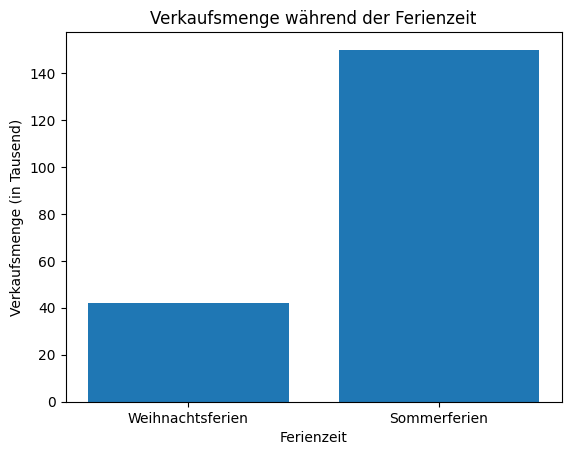

In [85]:
# Daten für Weihnachtsferien filtern und Menge summieren
weihnachtsferien = data[data['Ferienzeit TG'] == 'Weihnachtsferien']
weihnachtsferien_summe = weihnachtsferien['Menge'].sum() / 1000

# Daten für Sommerferien filtern und Menge summieren
sommerferien = data[data['Ferienzeit TG'] == 'Sommerferien']
sommerferien_summe = sommerferien['Menge'].sum() / 1000

# Balkendiagramm erstellen
ferien = ['Weihnachtsferien', 'Sommerferien']
verkaufsmenge = [weihnachtsferien_summe, sommerferien_summe]

plt.bar(ferien, verkaufsmenge)
plt.xlabel('Ferienzeit')
plt.ylabel('Verkaufsmenge (in Tausend)')
plt.title('Verkaufsmenge während der Ferienzeit')
plt.show()


Obwohl die Sommerferien nur doppelt so lange dauern wie die Winterferien, werden ca. drei Mal so viele Backwaren verkauft.

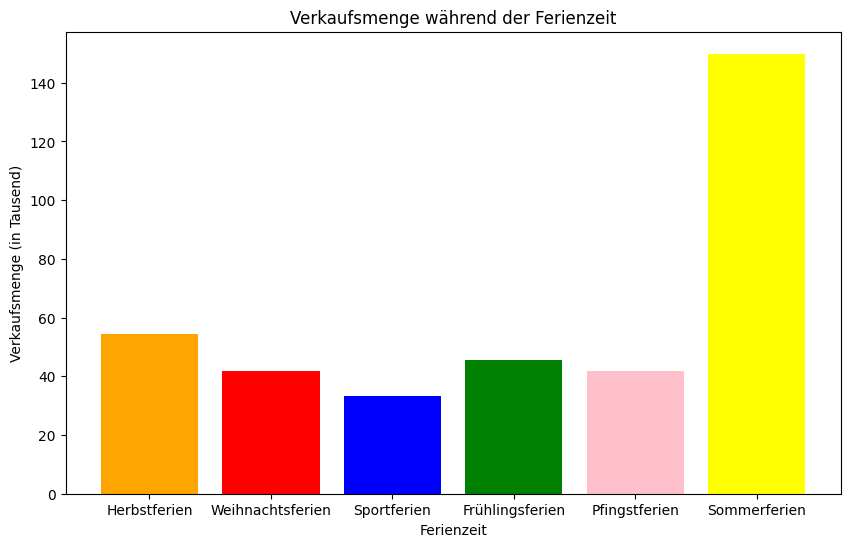

In [86]:
# Liste der Ferienzeiten
ferienzeiten = ['Herbstferien', 'Weihnachtsferien', 'Sportferien', 'Frühlingsferien', 'Pfingstferien', 'Sommerferien']

# Verkaufsmenge für jede Ferienzeit berechnen
verkaufsmenge = []
for ferienzeit in ferienzeiten:
    ferien = data[data['Ferienzeit TG'] == ferienzeit]
    ferien_summe = ferien['Menge'].sum() / 1000
    verkaufsmenge.append(ferien_summe)

# Farben definieren
farben = ['orange', 'red', 'blue', 'green', 'pink', 'yellow']

# Balkendiagramm erstellen
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(ferienzeiten, verkaufsmenge, color=farben)
ax.set_xlabel('Ferienzeit')
ax.set_ylabel('Verkaufsmenge (in Tausend)')
ax.set_title('Verkaufsmenge während der Ferienzeit')
plt.show()

Man sieht, die Zeit der Sommerferien ist mit Abstand die profitabelste Ferienzeit für die Bäckerei.

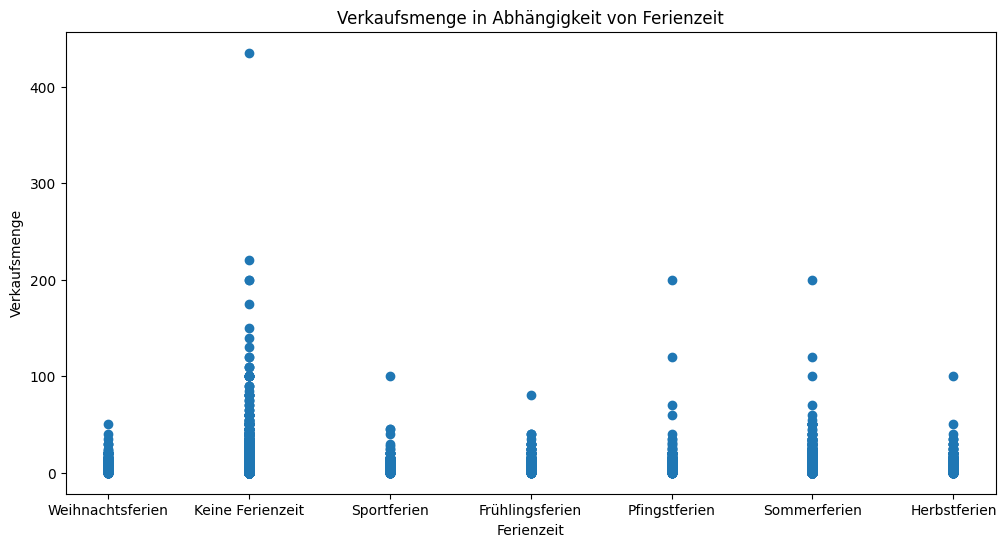

In [87]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(data['Ferienzeit TG'], data['Menge'])
ax.set_title('Verkaufsmenge in Abhängigkeit von Ferienzeit')
ax.set_xlabel('Ferienzeit')
ax.set_ylabel('Verkaufsmenge')
plt.show()

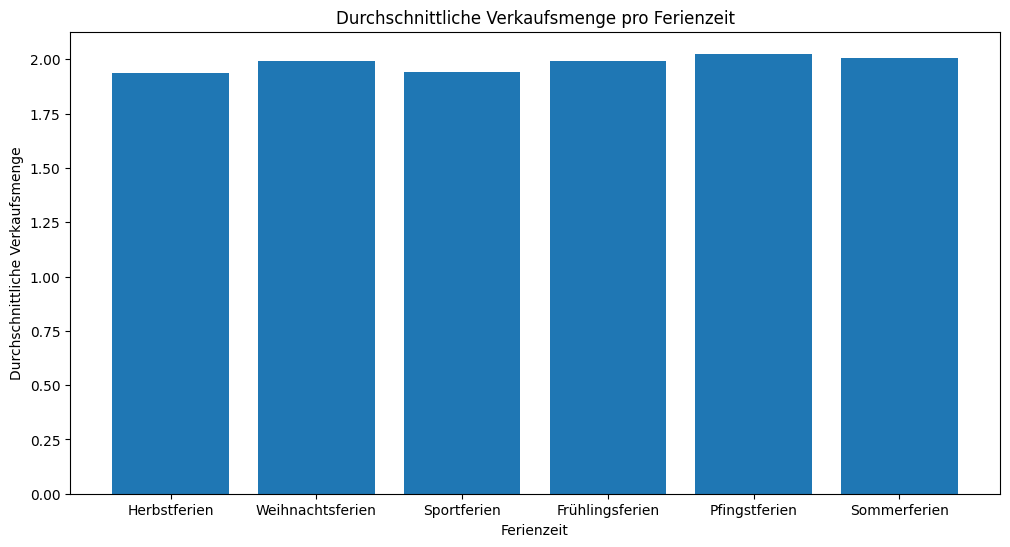

In [88]:
import pandas as pd
import matplotlib.pyplot as plt


# Umwandeln der Ferienzeit-Spalte in eine kategorische Variable und Festlegen der Sortierung
ferienzeit_order = ["Herbstferien", "Weihnachtsferien", "Sportferien", "Frühlingsferien", "Pfingstferien", "Sommerferien"]
data["Ferienzeit TG"] = pd.Categorical(data["Ferienzeit TG"], categories=ferienzeit_order, ordered=True)

# Gruppieren nach Ferienzeit und Berechnen der durchschnittlichen Verkaufsmenge
grouped_data = data.groupby("Ferienzeit TG")["Menge"].mean()

# Erstellen des Balkendiagramms
plt.figure(figsize=(12, 6))
plt.bar(grouped_data.index, grouped_data.values)
plt.title("Durchschnittliche Verkaufsmenge pro Ferienzeit")
plt.xlabel("Ferienzeit")
plt.ylabel("Durchschnittliche Verkaufsmenge")
plt.show()


### 2.3.2 Schulferien SG

Im Kanton SG gibt es keine Pfingsferien, dafür aber eine Woche länger Herbstferien, als im Kanton TG. Weil sich das Einzugsgebiet der Mohn Filiale in Sulgen, auch über den benachbarten Kanton SG erstreckt, werden die Herbstferienwoche sowie die fehlende Woche Pfingstferien in einer neuen Spalte 'Ferienzeit SG' hinzugefügt. Im Kanton SG variieren die Sportferien bzw. Winterferien, je nach Gemeinde. Wir haben uns dafür entschieden, dieselbe Woche, wie für den Kanton TG dafür zu wählen.

In [89]:
import datetime

# Daten von https://www.feiertagskalender.ch/ferien.php?geo=1827&jahr=2021


# Ferienlisten nach Ferienzeit erstellen
gesamtliste_herbstferien_sg = []


#### Schuljahr 2016/ 2017

In [90]:
import datetime
# Herbstferien Schuljahr 2016 / 2017
ferienbeginn_sg_herbst2016_2017 = datetime.date(2016, 10, 3)
ferienende_sg_herbst2016_2017 = datetime.date(2016, 10, 23)

current_date = ferienbeginn_sg_herbst2016_2017
herbstferien_sg_sj_2016_2017 = []

while current_date <= ferienende_sg_herbst2016_2017:
    herbstferien_sg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien_sg.extend(herbstferien_sg_sj_2016_2017)

#### Schuljahr 2017/ 2018

In [91]:
import datetime
# Herbstferien Schuljahr 2017 / 2018
ferienbeginn_sg_herbst2017_2018 = datetime.date(2017, 10, 2)
ferienende_sg_herbst2017_2018 = datetime.date(2017, 10, 22)

current_date = ferienbeginn_sg_herbst2017_2018
herbstferien_sg_sj_2017_2018 = []

while current_date <= ferienende_sg_herbst2017_2018:
    herbstferien_sg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien_sg.extend(herbstferien_sg_sj_2017_2018)

#### Schuljahr 2018/ 2019

In [92]:
import datetime
# Herbstferien Schuljahr 2018 / 2019
ferienbeginn_sg_herbst2018_2019 = datetime.date(2018, 10, 1)
ferienende_sg_herbst2018_2019 = datetime.date(2018, 10, 21)

current_date = ferienbeginn_sg_herbst2018_2019
herbstferien_sg_sj_2018_2019 = []

while current_date <= ferienende_sg_herbst2018_2019:
    herbstferien_sg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien_sg.extend(herbstferien_sg_sj_2018_2019)

#### Schuljahr 2019/ 2020 

In [93]:
import datetime
# Herbstferien Schuljahr 2019 / 2020
ferienbeginn_sg_herbst2019_2020 = datetime.date(2019, 9, 30)
ferienende_sg_herbst2019_2020 = datetime.date(2019, 10, 20)

current_date = ferienbeginn_sg_herbst2019_2020
herbstferien_sg_sj_2019_2020 = []

while current_date <= ferienende_sg_herbst2019_2020:
    herbstferien_sg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien_sg.extend(herbstferien_sg_sj_2019_2020)

#### Schuljahr 2020/ 2021

In [94]:
import datetime
# Herbstferien Schuljahr 2020 / 2021
ferienbeginn_sg_herbst2020_2021 = datetime.date(2020, 9, 28)
ferienende_sg_herbst2020_2021 = datetime.date(2020, 10, 18)

current_date = ferienbeginn_sg_herbst2020_2021
herbstferien_sg_sj_2020_2021 = []

while current_date <= ferienende_sg_herbst2020_2021:
    herbstferien_sg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien_sg.extend(herbstferien_sg_sj_2020_2021)

#### Schuljahr 2021/ 2022

In [95]:
import datetime
# Herbstferien Schuljahr 2021 / 2022
ferienbeginn_sg_herbst2021_2022 = datetime.date(2021, 10, 4)
ferienende_sg_herbst2021_2022 = datetime.date(2021, 10, 24)

current_date = ferienbeginn_sg_herbst2021_2022
herbstferien_sg_sj_2021_2022 = []

while current_date <= ferienende_sg_herbst2021_2022:
    herbstferien_sg_sj_2021_2022.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien_sg.extend(herbstferien_sg_sj_2021_2022)

#### Schulferienzeiten SG in Dataframe hinzufügen

In [96]:
data['Datum'] = pd.to_datetime(data['Datum'])

data['Ferienzeit SG'] = 'Keine Ferienzeit'

# Abweichende Herbstferien SG zu hinzufügen
data.loc[data['Datum'].isin(gesamtliste_herbstferien_sg), 'Ferienzeit SG'] = 'Herbstferien'

# Pfingsferien werden nicht hinzugefügt

# Gleiche Ferientage TG und SG hinzufügen
data.loc[data['Datum'].isin(gesamtliste_weihnachtsferien), 'Ferienzeit SG'] = 'Weihnachtsferien'
data.loc[data['Datum'].isin(gesamtliste_sportferien), 'Ferienzeit SG'] = 'Sportferien'
data.loc[data['Datum'].isin(gesamtliste_fruehlingsferien), 'Ferienzeit SG'] = 'Frühlingsferien'
data.loc[data['Datum'].isin(gesamtliste_sommerferien), 'Ferienzeit SG'] = 'Sommerferien'

In [ ]:
# Testen, ob Werte im dataframe hinzugefügt wurden
new_data = data[['Ferienzeit TG', 'Ferienzeit SG', 'Datum']]
sorted_data_nachHerbstferienSG = new_data[new_data['Ferienzeit SG'].str.startswith('Herbstferien')].sort_values(by=['Ferienzeit SG'])
sorted_data_nachHerbstferienSG.head(89999)

,Ferienzeit TG,Ferienzeit SG,Datum
4561,NaN,Herbstferien,2016-10-07
471309,Herbstferien,Herbstferien,2020-10-17
471310,Herbstferien,Herbstferien,2020-10-17
471311,Herbstferien,Herbstferien,2020-10-17
471312,Herbstferien,Herbstferien,2020-10-17
...,...,...,...
233278,Herbstferien,Herbstferien,2018-10-20
233279,Herbstferien,Herbstferien,2018-10-20
233280,Herbstferien,Herbstferien,2018-10-20
233282,Herbstferien,Herbstferien,2018-10-20


### 2.3.3 Süß und Herzhaft

Wir vermuten einen Zusammenhang zwischen verkaufter Menge und ob ein Produkt süß oder herzhaft ist. Eine Hypothese ist hier beispielsweise, dass an manchen Tagen mehr süße Produkte als Herzhafte Produkte verkauft werden. So könnten Kunden vielleicht Montags eher süßes Gebäck kaufen, weil sie gestresst wegen der Arbeit sind. Genauso gut, könnte ein Peak aber auch richtung Wochenende liegen, da viele sich dann eher etwas süßes vom Bäcker gönnen. 

(Anmerkung: Wir haben die Christliche Fastenzeit nur bis Gründonnerstag beschränkt, obwohl sie streng genommen bis Ostersonntag geht. Grund dafür ist, dass viele Gebäck für die Feiertage im Voraus einkaufen)

In [98]:
# Manuelle Klassifizierung der Produkte in 'süss' und 'herzhaft'
produkte_süß_herzhaft = pd.DataFrame(produkt_liste['Artikel'])
attribute = ['süss', 'herzhaft', 'herzhaft', 'herzhaft', 'herzhaft', 'herzhaft', 'süss', 'süss', 'süss', 'süss', 'süss', 'herzhaft','süss','süss']
produkte_süß_herzhaft['Geschmack'] = attribute
produkte_süß_herzhaft

# Daten mit den manuell klassifizierten Produkten zusammenführen
data = pd.merge(data, produkte_süß_herzhaft, on='Artikel')
data = data.rename(columns={'Geschmack_y': 'Geschmack'})


C:\Users\marin\AppData\Local\Temp\ipykernel_3160\3329364770.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Geschmack_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = pd.merge(data, produkte_süß_herzhaft, on='Artikel')


### 2.3.4 Fastenzeit

Als erstes Fügen wir die Christliche Fastenzeit zum Datensatz hinzu, da wir vermuten, dass einige Menschen in der Fastenzeit zumindest weniger Alkohol und Süßigkeiten konsumieren. 

In [99]:
import datetime 
start_datum = data["Datum"].min()
end_datum = data["Datum"].max()

# Fastenzeit start und Enddaten zwischen 2015 und 2022
fastenzeit = [
    (datetime.date(2015, 2, 18), datetime.date(2015, 4, 2)),
    (datetime.date(2016, 2, 10), datetime.date(2016, 3, 24)),
    (datetime.date(2017, 3, 1), datetime.date(2017, 4, 16)),
    (datetime.date(2018, 2, 14), datetime.date(2018, 3, 29)),
    (datetime.date(2019, 3, 6), datetime.date(2019, 4, 18)),
    (datetime.date(2020, 2, 26), datetime.date(2020, 4, 9)),
    (datetime.date(2021, 2, 17), datetime.date(2021, 4, 1)),
    (datetime.date(2022, 3, 2), datetime.date(2022, 4, 14)),
]
# Function to check if a date is within Lent period
def is_lent(date):
    for start, end in fastenzeit:
        if start <= date.date() <= end:

        
            return 1
    return 0

# Anwendung der Funktion auf die Daten und Erstellung einer neuen Spalte
data['Fastenzeit'] = data["Datum"].apply(is_lent)


Als nächstes fügen wir eine Spalte hinzu die sagt, ob ein Verkauf während des Ramadhans stattgefunden hat. Wir vermuten hier einen Zusammenhang mit den Verkäufen, da sich auch eine Muslimische Gemeinde in der Nähe der Filiale befindet

In [100]:
# Ramadan Start und Enddaten zwischen 2015 und 2022
import datetime 
Ramadan = [
    (datetime.date(2015, 6, 17), datetime.date(2015, 7, 16)),
    (datetime.date(2016, 6, 6), datetime.date(2016, 7, 5)),
    (datetime.date(2017, 5, 26), datetime.date(2017, 6, 24)),
    (datetime.date(2018, 5, 16), datetime.date(2018, 6, 14)),
    (datetime.date(2019, 5, 5), datetime.date(2019, 6, 3)),
    (datetime.date(2020, 4, 23), datetime.date(2020, 5, 23)),
    (datetime.date(2021, 4, 12), datetime.date(2021, 5, 12)),
    (datetime.date(2022, 4, 1), datetime.date(2022, 5, 1)),
]

# Function to check if a date is within Ramadan period
def is_ramadan(date):
    for start, end in Ramadan:
        if start <= date.date() <= end:

       

            return 1
    return 0

# Anwendung der Funktion auf die Daten und Erstellung einer neuen Spalte
data['Ramadan'] = data['Datum'].apply(is_ramadan)

### 2.3.5 Lohnzahlungen

Generell gilt in der Schweiz, dass der Lohn am letzten des Monats ausbezahlt werden muss. Obwohl viele Firmen am 25. des Monats ausbezahlen gibt es hierzu keine gesetzliche, sondern höchstens vertragliche Bindung. Aus diesem Grund nehmen wir den letzten des Monats (solange Wochentag) für den Zahltag. 

In [125]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd, BDay


# Konvertiere das Datumsformat in datetime-Format
data['Datum'] = pd.to_datetime(data['Datum'])

# Bestimme das Datum des letzten Tages des Monats
letzter_tag_des_monats = data['Datum'] + MonthEnd(1)

# Bestimme den Tag vor dem letzten Tag des Monats, wenn der letzte Tag ein Samstag ist
letzter_tag_des_monats[letzter_tag_des_monats.dt.day_name() == 'Saturday'] -= BDay(1)

# Bestimme zwei Tage vor dem letzten Tag des Monats, wenn der letzte Tag ein Sonntag ist
letzter_tag_des_monats[letzter_tag_des_monats.dt.day_name() == 'Sunday'] -= BDay(2)

# Erstelle eine neue Spalte 'Zahltag'
data['Zahltag'] = (data['Datum'] == letzter_tag_des_monats.dt.date).astype(int)

# Testen, ob Werte im dataframe hinzugefügt wurden
sorted_data = data.sort_values('Zahltag', ascending = False)
sorted_data.head()


,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,...,Fastenzeit,Ramadan,Zahltag,Steuerfrist März,Steuerfrist Mai,Steuerfrist August,Geschmack_x,Geschmack,Zahltagszeit,Menge ein Jahr zuvor
596059,Quarkzöpfli,2.0,7.6,0.0,0.0,NaN,0.2,NaN,06:39:01,6,...,0,0,1,0,1,0,süss,süss,None,NaN
403633,St. Gallerbürli,4.0,5.6,40.0,0.0,8.462500,0.0,76.916667,10:15:45,10,...,0,0,1,0,0,0,herzhaft,herzhaft,None,NaN
213735,Maisgipfel,2.0,3.0,0.0,0.6,3.583333,15.3,54.041667,09:30:03,9,...,0,0,1,0,1,1,herzhaft,herzhaft,None,NaN
213736,Maisgipfel,1.0,1.5,0.0,0.6,3.583333,15.3,54.041667,10:02:17,10,...,0,0,1,0,1,1,herzhaft,herzhaft,None,NaN
213737,Maisgipfel,4.0,6.0,0.0,0.6,3.583333,15.3,54.041667,10:27:35,10,...,0,0,1,0,1,1,herzhaft,herzhaft,None,NaN


In [134]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd, BDay

# Konvertiere das Datumsformat in datetime-Format
data['Datum'] = pd.to_datetime(data['Datum'], format='%Y-%m-%d')

# Bestimme das Datum des letzten Tages des Monats
letzter_tag_des_monats = data['Datum'] + MonthEnd(1)

# Bestimme den Tag vor dem letzten Tag des Monats, wenn der letzte Tag ein Samstag ist
letzter_tag_des_monats[letzter_tag_des_monats.dt.day_name() == 'Saturday'] -= BDay(1)

# Bestimme zwei Tage vor dem letzten Tag des Monats, wenn der letzte Tag ein Sonntag ist
letzter_tag_des_monats[letzter_tag_des_monats.dt.day_name() == 'Sunday'] -= BDay(2)

# Bestimme den ersten Tag der Zahltagszeit
erster_tag_zahltagszeit = letzter_tag_des_monats - pd.offsets.Day(24)

# Bestimme den ersten Werktag (Montag bis Freitag) der Zahltagszeit, wenn der 25. ein Samstag oder Sonntag ist
if data['Datum'][0].day == 25 and (data['Datum'][0].weekday() == 5 or data['Datum'][0].weekday() == 6):
    erster_tag_zahltagszeit -= pd.offsets.Day(1)
    if erster_tag_zahltagszeit.weekday() == 5:
        erster_tag_zahltagszeit -= pd.offsets.Day(1)
    elif erster_tag_zahltagszeit.weekday() == 6:
        erster_tag_zahltagszeit -= pd.offsets.Day(2)

# Bestimme den letzten Tag der Zahltagszeit, wenn der letzte Tag des Monats ein Samstag oder Sonntag ist
if letzter_tag_des_monats.dt.day_name().values[0] in ['Saturday', 'Sunday']:
    letzter_tag_zahltagszeit = letzter_tag_des_monats - pd.offsets.Day(letzter_tag_des_monats.day)
    letzter_tag_zahltagszeit += pd.offsets.Day(24)
    if letzter_tag_zahltagszeit.weekday() == 5:
        letzter_tag_zahltagszeit -= pd.offsets.Day(1)
    elif letzter_tag_zahltagszeit.weekday() == 6:
        letzter_tag_zahltagszeit -= pd.offsets.Day(2)
else:
    letzter_tag_zahltagszeit = letzter_tag_des_monats - pd.offsets.Day(24)

# Erstelle eine neue Spalte 'Zahltagszeit'
zahltagszeit = pd.date_range(start=erster_tag_zahltagszeit, end=letzter_tag_zahltagszeit, freq='D')
data['Zahltagszeit'] = pd.Series(data['Datum'].isin(zahltagszeit)).astype(int)


TypeError: Cannot convert input [0        2016-01-04
1        2016-01-04
2        2016-01-04
3        2016-01-04
4        2016-01-04
            ...    
719673   2021-05-07
719674   2021-05-07
719675   2021-05-07
719676   2021-05-07
719677   2021-05-07
Name: Datum, Length: 719678, dtype: datetime64[ns]] of type <class 'pandas.core.series.Series'> to Timestamp

In [128]:
new_data = data[['Zahltag', 'Datum']]

new_data.head(787878)


,Zahltag,Datum
0,0,2016-01-03
1,0,2016-01-03
2,0,2016-01-03
3,0,2016-01-03
4,0,2016-01-03
...,...,...
719673,0,2021-05-25
719674,0,2021-05-25
719675,0,2021-05-25
719676,0,2021-05-26


### 2.3.6 Steuererklärungszeit

Laut Aussagen von Herrn Roger Mohn kauft die Kundschaft bewusster ein, wenn die Zeit für das Ausfüllen der Steuererklärung ansteht. Im Kanton Thurgau müssen natürliche Pesonen Ihre Einkommens- und Vermögenssteuern bis 31.03. im Folgejahr einreichen. Wenn sie das nicht machen, können sie das noch ohne spezielle Bewilligung bis zum 31.05. tun. Wenn eine Person länger braucht, muss sie / er eine Spezialbewilligung einholen und kann dann bis spätenstens 31.08 einreichen. Da die Daten zur Einreichung der Formulare variieren, nehmen wir nur die definitiven Fristen in den Datensatz mit ein. Wir verwenden dafür eine Woche zuvor als sogenannte "Steuerfrist".

#### 2.3.6.1 Steuerfrist März

In [102]:
from datetime import datetime, timedelta

# Spalte "Steuerfrist März" hinzufügen
data['Steuerfrist März'] = 0

# 1 Woche vor dem 31.03 des jeweiligen Jahres den Wert auf 1 setzen
for idx, row in data.iterrows():
    year = row['Datum'].year
    fristdatum = datetime(year, 3, 31) - timedelta(weeks=1)
    if row['Datum'] <= fristdatum:
        data.at[idx, 'Steuerfrist März'] = 1



KeyboardInterrupt: 

In [ ]:
# Testen, ob Werte im dataframe hinzugefügt wurden
sorted_data_nachSteuerfristMaerz = data.sort_values('Steuerfrist März', ascending=False)
sorted_data_nachSteuerfristMaerz.head()

,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,...,Feiertag Name,Vortag von,Ferienzeit TG,Ferienzeit SG abweichend,Ferienzeit SG,Geschmack,Fastenzeit,Ramadan,Zahltag,Steuerfrist März
0,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:01:46,8,...,normaler Tag,normaler Tag,Weihnachtsferien,,Weihnachtsferien,süss,0,0,0,1
330921,Laugenbrötli,1.0,1.0,0.0,0.0,7.666667,1.0,114.208333,09:40:10,9,...,normaler Tag,normaler Tag,NaN,,Keine Ferienzeit,herzhaft,1,0,0,1
330923,Laugenbrötli,1.0,1.0,0.0,0.0,7.666667,1.0,114.208333,09:54:20,9,...,normaler Tag,normaler Tag,NaN,,Keine Ferienzeit,herzhaft,1,0,0,1
330924,Laugenbrötli,1.0,1.0,0.0,0.0,7.666667,1.0,114.208333,09:55:00,9,...,normaler Tag,normaler Tag,NaN,,Keine Ferienzeit,herzhaft,1,0,0,1
330925,Laugenbrötli,4.0,4.0,0.0,0.0,7.666667,1.0,114.208333,09:56:45,9,...,normaler Tag,normaler Tag,NaN,,Keine Ferienzeit,herzhaft,1,0,0,1


#### 2.3.6.2 Steuerfrist Mai

In [ ]:
# Spalte "Steuerfrist März" hinzufügen
data['Steuerfrist Mai'] = 0

# 1 Woche vor dem 31.03 des jeweiligen Jahres den Wert auf 1 setzen
for idx, row in data.iterrows():
    year = row['Datum'].year
    fristdatum = datetime(year, 5, 31) - timedelta(weeks=1)
    if row['Datum'] <= fristdatum:
        data.at[idx, 'Steuerfrist Mai'] = 1

In [ ]:
# Testen, ob Werte im dataframe hinzugefügt wurden
sorted_data_nachSteuerfristMai = data.sort_values('Steuerfrist Mai', ascending=False)
sorted_data_nachSteuerfristMai.head()

,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,...,Vortag von,Ferienzeit TG,Ferienzeit SG abweichend,Ferienzeit SG,Geschmack,Fastenzeit,Ramadan,Zahltag,Steuerfrist März,Steuerfrist Mai
0,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:01:46,8,...,normaler Tag,Weihnachtsferien,,Weihnachtsferien,süss,0,0,0,1,1
376660,St. Gallerbürli,1.0,1.4,0.0,0.0,9.85,0.0,139.25,08:01:19,8,...,normaler Tag,NaN,,Keine Ferienzeit,herzhaft,1,0,0,0,1
376658,St. Gallerbürli,6.0,8.4,0.0,0.0,9.85,0.0,139.25,07:42:41,7,...,normaler Tag,NaN,,Keine Ferienzeit,herzhaft,1,0,0,0,1
376657,St. Gallerbürli,2.0,2.8,0.0,0.0,9.85,0.0,139.25,07:38:50,7,...,normaler Tag,NaN,,Keine Ferienzeit,herzhaft,1,0,0,0,1
376656,St. Gallerbürli,4.0,5.6,0.0,0.0,9.85,0.0,139.25,07:00:42,7,...,normaler Tag,NaN,,Keine Ferienzeit,herzhaft,1,0,0,0,1


#### 2.3.6.3 Steuerfrist August

In [ ]:
# Spalte "Steuerfrist März" hinzufügen
data['Steuerfrist August'] = 0

# 1 Woche vor dem 31.03 des jeweiligen Jahres den Wert auf 1 setzen
for idx, row in data.iterrows():
    year = row['Datum'].year
    fristdatum = datetime(year, 8, 31) - timedelta(weeks=1)
    if row['Datum'] <= fristdatum:
        data.at[idx, 'Steuerfrist August'] = 1

KeyboardInterrupt: 

In [ ]:
# Testen, ob Werte im dataframe hinzugefügt wurden
sorted_data_nachSteuerfristMai = data.sort_values('Steuerfrist August', ascending = False)
sorted_data_nachSteuerfristMai.head()

,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,...,Ferienzeit TG,Ferienzeit SG abweichend,Ferienzeit SG,Geschmack,Fastenzeit,Ramadan,Zahltag,Steuerfrist März,Steuerfrist Mai,Steuerfrist August
0,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:01:46,8,...,Weihnachtsferien,,Weihnachtsferien,süss,0,0,0,1,1,1
430670,Laugengi.mit SoBlu,1.0,1.5,60.0,0.0,5.1625,0.0,61.416667,11:16:29,11,...,NaN,,Keine Ferienzeit,herzhaft,0,0,0,1,1,1
430664,Laugengi.mit SoBlu,1.0,1.5,60.0,0.0,5.1625,0.0,61.416667,09:39:59,9,...,NaN,,Keine Ferienzeit,herzhaft,0,0,0,1,1,1
430665,Laugengi.mit SoBlu,2.0,3.0,60.0,0.0,5.1625,0.0,61.416667,09:50:07,9,...,NaN,,Keine Ferienzeit,herzhaft,0,0,0,1,1,1
430666,Laugengi.mit SoBlu,4.0,6.0,60.0,0.0,5.1625,0.0,61.416667,09:59:30,9,...,NaN,,Keine Ferienzeit,herzhaft,0,0,0,1,1,1


## 2.3.7 Menge ein Jahr zuvor

In [123]:
# Füge eine neue Spalte 'Menge ein Jahr zuvor' hinzu und setze sie auf NaN
data['Menge ein Jahr zuvor'] = pd.Series(dtype='float64')

# Gehe jeden Tag im Datensatz durch
for index, row in data.iterrows():
    # Berechne das Datum ein Jahr zuvor
    ein_jahr_zuvor = row['Datum'] - pd.DateOffset(years=1)
    
    # Filtere den Datensatz nach dem Datum ein Jahr zuvor
    menge_vor_einem_jahr = data[(data['Datum'] == ein_jahr_zuvor) & (data['Artikel'] == row['Artikel'])]['Menge']
    
    # Setze den Wert der 'Menge ein Jahr zuvor'-Spalte auf die Summe der Menge von vor einem Jahr
    data.at[index, 'Menge ein Jahr zuvor'] = menge_vor_einem_jahr.sum()

# Testen, ob die Werte im Dataframe hinzugefügt wurden
sorted_data = data.sort_values('Datum', ascending=True)
sorted_data.head()


KeyboardInterrupt: 